In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
lb_make=LabelEncoder()
from sklearn.metrics import confusion_matrix


In [2]:
missing_values = ["n/a", "na", "Infinity", "NaN","nan","-","excel","?","#DIV/0!","aza"]
df = pd.read_csv("df_training.csv", na_values = missing_values, engine='python', skipinitialspace=True)
df=df.fillna(df.median())


In [3]:
X = df.drop('class3', axis=1)
y = df['class3']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Fit scaler to input features and transform data
X = scaler.fit_transform(X)
X_train=X 
y_train=y

In [4]:
# Define the DNN model architecture
model = keras.Sequential([
    keras.layers.Dense(200, input_dim=X_train.shape[1], activation='relu'),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the DNN model
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

In [5]:

# Train the DNN model
history = model.fit(X_train, y_train, epochs=10, batch_size=250, validation_split=0.1)

Epoch 1/10
2364/2364 [==============================] - 11s 4ms/step - loss: 0.0518 - accuracy: 0.9812 - val_loss: 0.0786 - val_accuracy: 0.9602
Epoch 2/10
2364/2364 [==============================] - 9s 4ms/step - loss: 0.0277 - accuracy: 0.9904 - val_loss: 0.0770 - val_accuracy: 0.9657
Epoch 3/10
2364/2364 [==============================] - 9s 4ms/step - loss: 0.0225 - accuracy: 0.9930 - val_loss: 0.0116 - val_accuracy: 0.9991
Epoch 4/10
2364/2364 [==============================] - 10s 4ms/step - loss: 0.0199 - accuracy: 0.9943 - val_loss: 0.0107 - val_accuracy: 0.9982
Epoch 5/10
2364/2364 [==============================] - 10s 4ms/step - loss: 0.0186 - accuracy: 0.9949 - val_loss: 0.0081 - val_accuracy: 0.9994
Epoch 6/10
2364/2364 [==============================] - 10s 4ms/step - loss: 0.0170 - accuracy: 0.9956 - val_loss: 0.0040 - val_accuracy: 0.9997
Epoch 7/10
2364/2364 [==============================] - 10s 4ms/step - loss: 0.0166 - accuracy: 0.9958 - val_loss: 0.0042 - val_accu

In [6]:
df11 = pd.read_csv("df_testing.csv", na_values = missing_values, engine='python', skipinitialspace=True)

#only for off-bal
#df11.iloc[:, -1] = df11.iloc[:, -1].replace({ "attack":1, "normal":0})
df11=df11.fillna(df11.median())
X_test=df11.iloc[:, :-1]
y_test =df11.iloc[:, -1]

Accuracy:  0.9984101651966278
Precision:  0.9997614893109552
Recall:  0.996970607380702
F1-score:  0.9983640979034129
ROC AUC score:  0.9983725895334529


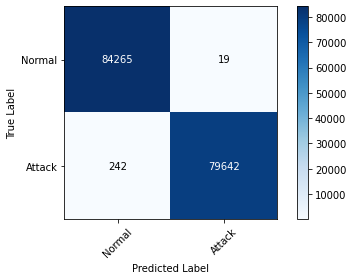

In [7]:
# Make predictions on test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Evaluate performance using various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print out evaluation metrics
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)
print("ROC AUC score: ", roc_auc)
import numpy as np
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

#[[TN, FP],
 #[FN, TP]]
class_names = [ 'Normal','Attack']
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_absolute=True,
                                show_normed=False, class_names=class_names,
                                colorbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')   
plt.tight_layout()                             
plt.savefig('CM22.png')

In [9]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import load_model  # Or however your model is defined or loaded
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

# Assuming 'model' is loaded or defined here
# model = load_model('your_model_path.h5')  # Example for Keras model

# Define missing values and load the main DataFrame
missing_values = ["n/a", "na", "Infinity", "NaN","nan","-","excel","?","#DIV/0!","aza"]
df_main = pd.read_csv("df_testing.csv", na_values=missing_values, engine='python', skipinitialspace=True)
df_main = df_main.fillna(df_main.median())

# List of additional CSV files to combine with
csv_files =  ['FSGM-XAAE-IIoT.csv', 'BIM-XAAE-IIoT.csv', 'DF-XAAE-IIoT.csv', 'JSMA-XAAE-IIoT.csv', 'CW2-XAAE-IIoT.csv','CWinf-XAAE-IIoT.csv']


for file_name in csv_files:
    # Load and preprocess the additional DataFrame
    df_additional = pd.read_csv(file_name, na_values=missing_values, engine='python', skipinitialspace=True)
    df_additional = df_additional.fillna(df_additional.median())
    
    # Combine DataFrames
    df_combined = pd.concat([df_main, df_additional], ignore_index=True)
    
    # Prepare data for model evaluation
    X_combined = df_combined.iloc[:, :-1]
    y_combined = df_combined.iloc[:, -1]
    
    # Make predictions on the combined dataset
    y_pred = model.predict(X_combined)
    y_pred = (y_pred > 0.5).astype(int)

    # Evaluate performance
    accuracy = accuracy_score(y_combined, y_pred)
    precision = precision_score(y_combined, y_pred)
    recall = recall_score(y_combined, y_pred)
    f1 = f1_score(y_combined, y_pred)
    roc_auc = roc_auc_score(y_combined, y_pred)

    # Print evaluation metrics
    print(f"Results for {file_name}:")
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1-score: ", f1)
    print("ROC AUC score: ", roc_auc)

    # Plot confusion matrix
    cm = confusion_matrix(y_combined, y_pred)
    class_names = ['Normal', 'Attack']
    fig, ax = plot_confusion_matrix(conf_mat=cm, class_names=class_names, show_absolute=True, show_normed=False, colorbar=True)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.savefig(f'CM_{file_name}.png')
    plt.close()


Results for FSGM-XAAE-IIoT.csv:
Accuracy:  0.6716765279530592
Precision:  0.9997615401993022
Recall:  0.49859170797656605
F1-score:  0.665360874685733
ROC AUC score:  0.7491831398313848
Results for BIM-XAAE-IIoT.csv:
Accuracy:  0.671606870666907
Precision:  0.9997614893109552
Recall:  0.498485303690351
F1-score:  0.6652661122921618
ROC AUC score:  0.7491299376882774
Results for DF-XAAE-IIoT.csv:
Accuracy:  0.6739137560847688
Precision:  0.999763163143199
Recall:  0.5020091632867658
F1-score:  0.6683972799093303
ROC AUC score:  0.7508918674864848
Results for JSMA-XAAE-IIoT.csv:
Accuracy:  0.6725165128743055
Precision:  0.9997621521475157
Recall:  0.49987481848680587
F1-score:  0.6665025391089543
ROC AUC score:  0.7498246950865048
Results for CW2-XAAE-IIoT.csv:
Accuracy:  0.6720821792077099
Precision:  0.9997618361181794
Recall:  0.499211356466877
F1-score:  0.6659124590369242
ROC AUC score:  0.7494929640765403
Results for CWinf-XAAE-IIoT.csv:
Accuracy:  0.6754953862291643
Precision:  0.